## Desafio de ultrapassar 99% na iris (overfit puro!!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
def faz_grafico(df,ax,x,y,ylabel=None,xlabel=None):
    ax.scatter(df[df['species'] == 'setosa'][x],
                df[df['species'] == 'setosa'][y],color='blue',marker='x',label='setosa')
    ax.scatter(df[df['species'] == 'virginica'][x],
                df[df['species'] == 'virginica'][y],color='orange',
                marker='o',label='virginica')
    ax.scatter(df[df['species'] == 'versicolor'][x],
                df[df['species'] == 'versicolor'][y],color='green',
                marker='^',label='versicolor')
    ax.legend()
    
    if ylabel!=None:
        ax.set_ylabel(y)
    if xlabel!=None:
        ax.set_xlabel(x)

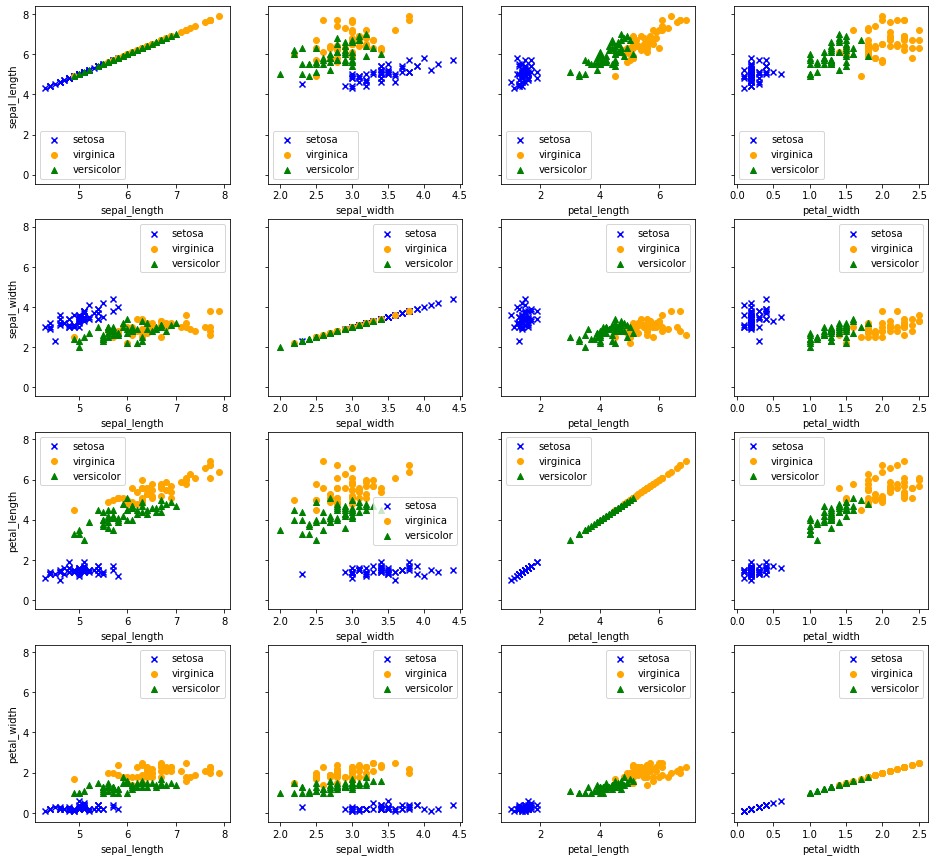

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 15), sharey=True)

count = 0
for y in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:

    faz_grafico(df,ax[count][0],'sepal_length', y,ylabel=1,xlabel=1)
    faz_grafico(df,ax[count][1],'sepal_width', y,xlabel=1)
    faz_grafico(df,ax[count][2],'petal_length', y,xlabel=1)
    faz_grafico(df,ax[count][3],'petal_width', y,xlabel=1)
    count = count+1

plt.show()

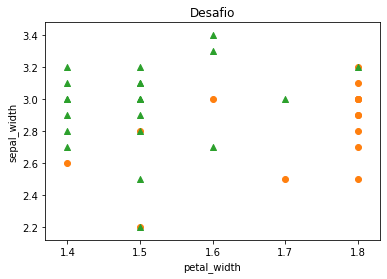

In [5]:
filtro = (df['species']=='setosa') & (df['petal_width']>1.3) & (df['petal_width']<1.9)
plt.scatter(df[filtro]['petal_width'],df[filtro]['sepal_width'],label='setosa',marker='x')

filtro = (df['species']=='virginica') & (df['petal_width']>1.3) & (df['petal_width']<1.9)
plt.scatter(df[filtro]['petal_width'],df[filtro]['sepal_width'],label='virginica',marker='o')

filtro = (df['species']=='versicolor') &(df['petal_width']>1.3) & (df['petal_width']<1.9)
plt.scatter(df[filtro]['petal_width'],df[filtro]['sepal_width'],label='versicolor',marker='^')

plt.title('Desafio')
#plt.legend(loc='upper right')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.show()

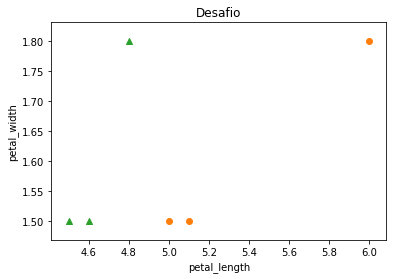

In [6]:
x = 'petal_length'
y = 'petal_width'

filtro = (df['species']=='setosa') & (((df['petal_width']==1.8) & (df['sepal_width']==3.2)) | 
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.2)) |
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.8)) )
plt.scatter(df[filtro][x],df[filtro][y],label='setosa',marker='x')



filtro = (df['species']=='virginica') & (((df['petal_width']==1.8) & (df['sepal_width']==3.2)) | 
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.2)) |
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.8)) )
plt.scatter(df[filtro][x],df[filtro][y],label='virginica',marker='o')



filtro = (df['species']=='versicolor') & (((df['petal_width']==1.8) & (df['sepal_width']==3.2)) | 
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.2)) |
                                         ((df['petal_width']==1.5) & (df['sepal_width']==2.8)) )
plt.scatter(df[filtro][x],df[filtro][y],label='versicolor',marker='^')

plt.title('Desafio')
#plt.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.show()

In [7]:
def modelo(sepal_length, sepal_width, petal_length, petal_width):
    if petal_width <= 0.8:
        return ("setosa")  

    elif 0.9 <= petal_width <= 1.3:
        return ("versicolor")
    
    elif petal_width >= 1.8:
        return ("virginica")
    
    elif (petal_width == 1.4 or petal_width == 1.7) and sepal_width < 2.7:
        return ("virginica")
    
    elif (petal_width == 1.6) and sepal_width == 3:
        return ("virginica")
    
    elif petal_length > 4.9 and ((sepal_width == 2.2) | (sepal_width == 2.8)):
        return ("virginica")
    
    else:
        return ("versicolor")

prev = []

for i in range(df.shape[0]):
    especie = modelo(df['sepal_length'].iloc[i],
                               df['sepal_width'].iloc[i],
                               df['petal_length'].iloc[i],
                               df['petal_width'].iloc[i])
    prev.append(especie)
    
df['prev'] = prev

sum(df['species']==df['prev'])/df.shape[0]

0.9933333333333333

## Desafio de classficação com a Wine

#### Ex1

Transformar a coluna target de [0,1,2] em ['class_0', 'class_1', 'class_2'], respectivamente

#### Ex 2
Fazer a parte descritiva dos dados e visualizações de padrões necessários

#### Ex 3

Classificar a base wine e medir a precisão da classificação. 

Obs: Esperamos algo superior a 80% de acerto.